In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [39]:
df = pd.read_csv(r'/kaggle/input/3sec-features/3sec_features.csv')
df.head()

,name,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,actual_multi_genre
0,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.415807,0.072298,0.272616,0.003458,1071.405850,124830.7978,1579.811905,172801.64380,...,32.417294,7.014239,27.476717,-1.217601,28.785315,0.618297,26.961672,-7.396918,28.644170,"Rock, Pop"
1,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.411221,0.077621,0.271611,0.004101,1091.232379,251883.2784,1593.324615,294182.07410,...,27.733225,-1.383345,39.802162,-5.495392,36.830288,7.911010,34.455340,3.651210,35.311550,"Rock, Pop"
2,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.511829,0.069412,0.291631,0.003943,1051.140250,114751.6252,1558.870991,152172.72120,...,30.249128,7.220845,25.881824,-2.801634,27.722574,2.708024,22.639078,-6.220536,39.085777,"Rock, Pop"
3,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.449659,0.073253,0.333232,0.003267,967.553472,120096.4001,1449.365069,161182.69100,...,31.660627,-2.379893,34.448370,-2.409710,41.797516,2.381857,44.143787,-10.076764,60.215656,"Rock, Pop"
4,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.406737,0.080221,0.327889,0.003120,959.808356,59398.2795,1426.996671,96487.01836,...,32.847797,3.834526,23.280157,-3.457653,32.983295,2.285278,20.172178,-6.665225,23.908913,"Rock, Pop"


In [40]:
rows = df.shape[0]
cols = df.shape[1]
print(f"Rows are: {rows} and columns are {cols}")

Rows are: 24620 and columns are 60


In [41]:
features = df.iloc[:,2:59]
features

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.415807,0.072298,0.272616,0.003458,1071.405850,124830.797800,1579.811905,172801.64380,2326.916174,1.133194e+06,...,-0.529794,32.417294,7.014239,27.476717,-1.217601,28.785315,0.618297,26.961672,-7.396918,28.644170
1,0.411221,0.077621,0.271611,0.004101,1091.232379,251883.278400,1593.324615,294182.07410,2458.027608,2.191394e+06,...,-6.527108,27.733225,-1.383345,39.802162,-5.495392,36.830288,7.911010,34.455340,3.651210,35.311550
2,0.511829,0.069412,0.291631,0.003943,1051.140250,114751.625200,1558.870991,152172.72120,2239.286845,9.873727e+05,...,4.105564,30.249128,7.220845,25.881824,-2.801634,27.722574,2.708024,22.639078,-6.220536,39.085777
3,0.449659,0.073253,0.333232,0.003267,967.553472,120096.400100,1449.365069,161182.69100,1997.266945,9.988308e+05,...,-6.826433,31.660627,-2.379893,34.448370,-2.409710,41.797516,2.381857,44.143787,-10.076764,60.215656
4,0.406737,0.080221,0.327889,0.003120,959.808356,59398.279500,1426.996671,96487.01836,1878.834327,5.051104e+05,...,-2.525133,32.847797,3.834526,23.280157,-3.457653,32.983295,2.285278,20.172178,-6.665225,23.908913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24615,0.295226,0.094016,0.021039,0.000056,291.978067,10063.002590,611.850135,24364.56725,375.542388,5.932551e+04,...,4.876591,38.339024,5.372583,25.366219,1.952211,50.508247,-0.673771,79.792470,-5.530555,63.067703
24616,0.283132,0.083223,0.052595,0.000264,292.447448,1168.048694,262.158416,9734.02002,420.105310,5.018519e+03,...,-2.352866,22.237856,3.869124,25.358006,3.410983,40.967182,-2.775848,40.147373,-6.390646,55.431150
24617,0.240055,0.079368,0.045204,0.000315,306.645198,7032.938495,349.910501,23974.73184,463.296426,2.565619e+04,...,-6.420828,44.450710,-6.042143,48.116177,-4.489713,37.759995,-2.741151,33.541245,-1.366368,44.849674
24618,0.285041,0.085068,0.033291,0.000050,235.185748,4547.305221,232.738334,26629.64422,349.685916,1.492662e+04,...,-18.476357,16.999535,-14.717143,21.652325,-9.331166,25.001644,-9.926890,16.550720,-9.825608,11.176955


In [42]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your data to compute the mean and standard deviation
scaler.fit(features)

# Transform (normalize) your data
features = scaler.transform(features)

In [43]:
print(features)

[[-0.23778143 -0.56958284  1.39860879 ... -0.64350893 -0.78104998
  -0.60403813]
 [-0.2823771  -0.19301091  1.38597871 ... -0.405898    1.4735443
  -0.39272929]
 [ 0.69592554 -0.77372126  1.63751961 ... -0.78057072 -0.54098536
  -0.27311295]
 ...
 [-1.94678015 -0.06945085 -1.45868283 ... -0.43488233  0.44960593
  -0.09043814]
 [-1.50934026  0.3337232  -1.60835611 ... -0.97362175 -1.27667336
  -1.15762545]
 [-1.51104982  0.4774126  -1.46243548 ... -0.65832789 -1.6726923
  -0.4270052 ]]


In [44]:
genres = df['actual_multi_genre']
genres[342]

'Rock, Metal'

In [45]:
set_genre = set()
for i in genres:
    set_genre = set_genre.union(set((i.split(', '))))

# for genre in genres.split(','):
#     genre = genre.strip()  # Remove leading/trailing spaces
#     set_genre.add(genre)
actual_genre = list(set_genre)
print(*actual_genre,sep="\n")
print(f"The length is {len(actual_genre)}")

R&B
Reggae
Punk
Classical
Blues
Rap & Hip-Hop
Dance & Electronic
Jazz
Pop
Metal
Rock
Folk
Bebop
Soul
Country
The length is 15


In [46]:
for genre in actual_genre:
    df[genre] = 0  # Initialize all new columns with 0
def one_hot_encode(row):
    for genre in row['actual_multi_genre'].split(', '):
        if genre in actual_genre:
            row[genre] = 1
    return row

df = df.apply(one_hot_encode, axis=1)

Exception ignored in: <function _xla_gc_callback at 0x7b59ce9a0a60>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/jax/_src/lib/__init__.py", line 103, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


In [47]:
df.drop('actual_multi_genre', axis=1,inplace=True)

In [48]:
df.head()

,name,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,Rap & Hip-Hop,Dance & Electronic,Jazz,Pop,Metal,Rock,Folk,Bebop,Soul,Country
0,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.415807,0.072298,0.272616,0.003458,1071.405850,124830.7978,1579.811905,172801.64380,...,0,0,0,1,0,1,0,0,0,0
1,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.411221,0.077621,0.271611,0.004101,1091.232379,251883.2784,1593.324615,294182.07410,...,0,0,0,1,0,1,0,0,0,0
2,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.511829,0.069412,0.291631,0.003943,1051.140250,114751.6252,1558.870991,152172.72120,...,0,0,0,1,0,1,0,0,0,0
3,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.449659,0.073253,0.333232,0.003267,967.553472,120096.4001,1449.365069,161182.69100,...,0,0,0,1,0,1,0,0,0,0
4,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.406737,0.080221,0.327889,0.003120,959.808356,59398.2795,1426.996671,96487.01836,...,0,0,0,1,0,1,0,0,0,0


In [49]:
labels = df.iloc[:,59:75]
print(*labels,sep="\n")
labels = labels.values
print(labels)

R&B
Reggae
Punk
Classical
Blues
Rap & Hip-Hop
Dance & Electronic
Jazz
Pop
Metal
Rock
Folk
Bebop
Soul
Country
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

In [55]:
mappings = {0:'R&B',1:'Reggae',2:'Punk',3:'Classical',4:'Blues',5:'Rap & Hip-Hop',6:'Dancee & Electronic',7:'Jazz',8:'Pop',
           9:'Metal',10:'Rock',11:'Folk',12:'Bebop',13:'Soul',14:'Country'}

In [64]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

In [65]:
print(X_train.shape)
print(X_train_copy.shape)

(16495, 57)
(16495, 57)


In [66]:
X_train_copy = X_train_copy[:, :, np.newaxis]
X_test_copy = X_test_copy[:, :, np.newaxis]

In [67]:
print(X_train.shape)
print(X_train_copy.shape)

(16495, 57)
(16495, 57, 1)


In [75]:
import numpy as np
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

# Configuration options
n_features = 57
n_classes = 15
n_labels = 15
n_epochs = 50
random_state = 42
batch_size = 32
verbosity = 1
validation_split = 0.2

# Create the basic CRNN model
model = Sequential()

# Convolutional layer for feature extraction
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_features, 1)))
model.add(MaxPooling1D(pool_size=2))

# Recurrent layer (LSTM) for handling sequential data
model.add(LSTM(64))

# Fully connected layer for classification
model.add(Dense(n_classes, activation='sigmoid'))

# Compile the model
model.compile(loss=binary_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit data to model
history = model.fit(X_train_copy, y_train, batch_size=batch_size, epochs=n_epochs, verbose=verbosity,
          validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(X_test_copy, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Epoch 1/50
413/413 [==============================] - 8s 16ms/step - loss: 0.3276 - accuracy: 0.3889 - val_loss: 0.3101 - val_accuracy: 0.3925
Epoch 2/50
413/413 [==============================] - 6s 15ms/step - loss: 0.3062 - accuracy: 0.3920 - val_loss: 0.3047 - val_accuracy: 0.3925
Epoch 3/50
413/413 [==============================] - 6s 15ms/step - loss: 0.2990 - accuracy: 0.3919 - val_loss: 0.2959 - val_accuracy: 0.3925
Epoch 4/50
413/413 [==============================] - 6s 15ms/step - loss: 0.2927 - accuracy: 0.3761 - val_loss: 0.2921 - val_accuracy: 0.3668
Epoch 5/50
413/413 [==============================] - 6s 15ms/step - loss: 0.2884 - accuracy: 0.3659 - val_loss: 0.2875 - val_accuracy: 0.3556
Epoch 6/50
413/413 [==============================] - 6s 15ms/step - loss: 0.2852 - accuracy: 0.3637 - val_loss: 0.2851 - val_accuracy: 0.3647
Epoch 7/50
413/413 [==============================] - 6s 15ms/step - loss: 0.2824 - accuracy: 0.3634 - val_loss: 0.2831 - val_accuracy: 0.3492

In [76]:
from sklearn.metrics import classification_report
# Make predictions on the test data
y_pred = model.predict(X_test)

# Threshold the predicted probabilities (e.g., using 0.5 as the threshold)
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

254/254 [==============================] - 1s 4ms/step


In [78]:
report = classification_report(y_test, y_pred_binary)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.68      0.29      0.41      1055
           1       0.80      0.15      0.25       220
           2       0.60      0.34      0.43       696
           3       0.72      0.37      0.49       246
           4       0.69      0.12      0.20       899
           5       0.75      0.51      0.61       652
           6       0.70      0.32      0.44      1291
           7       0.62      0.28      0.39      1334
           8       0.92      0.99      0.95      7297
           9       0.70      0.34      0.46       883
          10       0.72      0.75      0.73      4329
          11       0.51      0.22      0.31       871
          12       0.48      0.10      0.16       331
          13       0.67      0.28      0.40       663
          14       0.55      0.09      0.16       729

   micro avg       0.80      0.61      0.69     21496
   macro avg       0.67      0.34      0.42     21496
weighted avg       0.75   

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


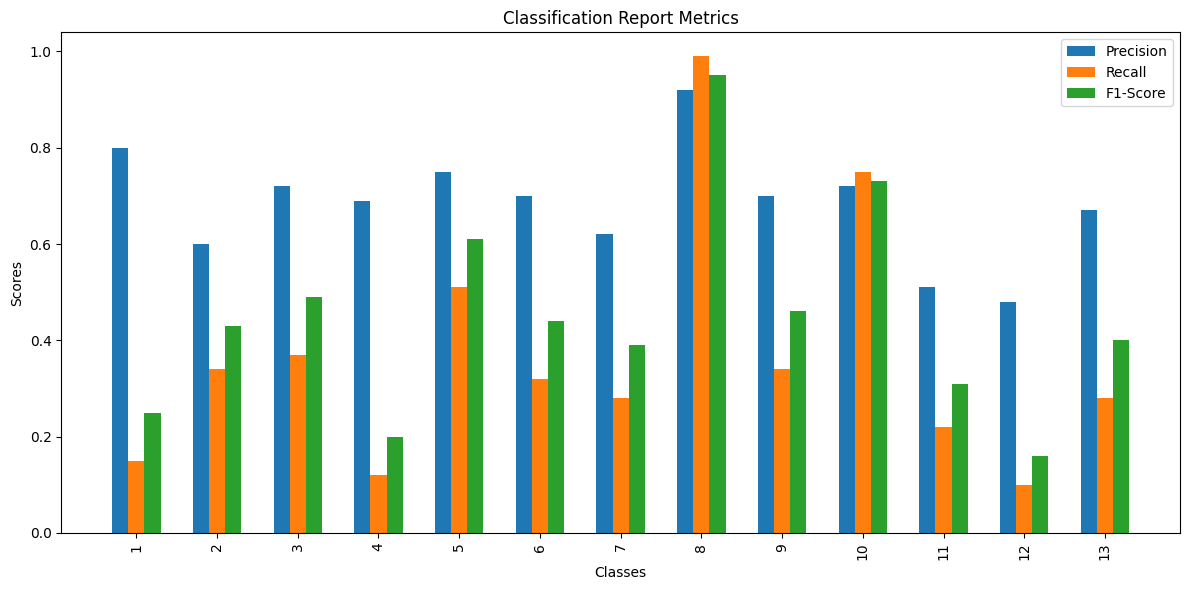

In [80]:
import matplotlib.pyplot as plt

# Replace this string with your classification report
classification_report_str = """
              precision    recall  f1-score   support

           0       0.68      0.29      0.41      1055
           1       0.80      0.15      0.25       220
           2       0.60      0.34      0.43       696
           3       0.72      0.37      0.49       246
           4       0.69      0.12      0.20       899
           5       0.75      0.51      0.61       652
           6       0.70      0.32      0.44      1291
           7       0.62      0.28      0.39      1334
           8       0.92      0.99      0.95      7297
           9       0.70      0.34      0.46       883
          10       0.72      0.75      0.73      4329
          11       0.51      0.22      0.31       871
          12       0.48      0.10      0.16       331
          13       0.67      0.28      0.40       663
          14       0.55      0.09      0.16       729

   micro avg       0.80      0.61      0.69     21496
   macro avg       0.67      0.34      0.42     21496
weighted avg       0.75      0.61      0.64     21496
 samples avg       0.81      0.66      0.69     21496


"""

# Parse the classification report
report_lines = classification_report_str.split('\n')
report_data = [line.split() for line in report_lines if line]

# Extract the data for precision, recall, and F1-score
labels = [data[0] for data in report_data[2:-5]]  # Exclude the last 4 lines
precision = [float(data[1]) for data in report_data[2:-5]]
recall = [float(data[2]) for data in report_data[2:-5]]
f1_score = [float(data[3]) for data in report_data[2:-5]]

# Create a bar graph to visualize the metrics
x = range(len(labels))
width = 0.2

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

plt.bar(x, precision, width, label='Precision', align='center')
plt.bar([i + width for i in x], recall, width, label='Recall', align='center')
plt.bar([i + 2 * width for i in x], f1_score, width, label='F1-Score', align='center')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.xticks([i + width for i in x], labels, rotation=90)  # Rotate x-axis labels for readability
plt.legend(loc='best')

plt.tight_layout()  # Adjusts spacing to prevent clipping of labels
plt.show()